In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("chroma_features.csv")
df.head()

,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,label
0,0.077247,0.188314,0.053440,0.212683,0.723530,0.161940,0.021939,0.030549,0.236161,0.785088,0.130416,0.083335,A
1,0.071102,0.430738,0.069206,0.094733,0.572442,0.086841,0.005785,0.009478,0.131720,0.818077,0.138837,0.009091,A
2,0.037523,0.159027,0.031404,0.041088,0.217697,0.037657,0.003623,0.004190,0.164426,0.992217,0.174717,0.027070,A
3,0.233633,0.748782,0.125536,0.212062,0.681549,0.155669,0.028943,0.050679,0.224622,0.519931,0.123941,0.108006,A
4,0.250924,0.272010,0.207126,0.416156,0.890181,0.423935,0.225789,0.317997,0.496362,0.645829,0.458147,0.421073,A


In [4]:
X = df.drop("label", axis=1)
y = df["label"]

print(X.shape)
print(y.shape)


(1523, 12)
(1523,)


In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Number of classes:", len(label_encoder.classes_))

Number of classes: 24


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(X_train.shape, X_test.shape)

(1218, 12) (305, 12)


In [7]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [8]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.9475409836065574


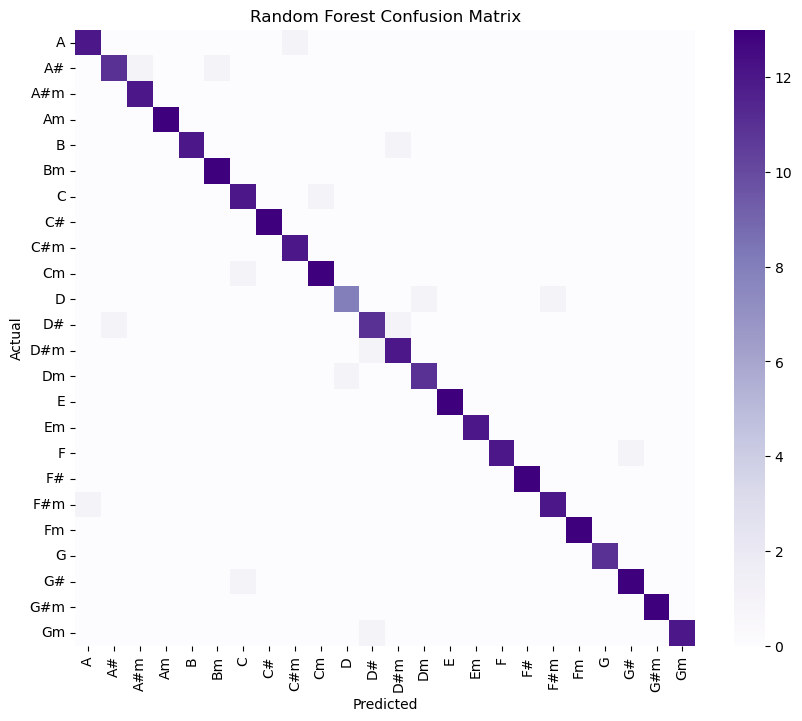

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, cmap="Purples", xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [10]:
print(classification_report(
    y_test, y_pred,
    target_names=label_encoder.classes_
))


              precision    recall  f1-score   support

           A       0.92      0.92      0.92        13
          A#       0.92      0.85      0.88        13
         A#m       0.92      1.00      0.96        12
          Am       1.00      1.00      1.00        13
           B       1.00      0.92      0.96        13
          Bm       0.93      1.00      0.96        13
           C       0.86      0.92      0.89        13
          C#       1.00      1.00      1.00        13
         C#m       0.92      1.00      0.96        12
          Cm       0.93      0.93      0.93        14
           D       0.89      0.80      0.84        10
          D#       0.85      0.85      0.85        13
         D#m       0.86      0.92      0.89        13
          Dm       0.92      0.92      0.92        12
           E       1.00      1.00      1.00        13
          Em       1.00      1.00      1.00        12
           F       1.00      0.92      0.96        13
          F#       1.00    

In [11]:
import joblib
joblib.dump(rf_model,"random_forest_chord_model.pk1")
joblib.dump(label_encoder,"label_encoder.pk1")
print("Model and label encoder saved")

Model and label encoder saved


In [12]:
import os 
os.getcwd()

'/Users/sajin/Final_Year_Chords_Project/notebooks'